# Кластеризация методом DBSCAN

**Данные:** Экономика городов

**Задание:** 
- Определить число кластеров **методом DBSCAN** и обосновать свой выбор
- Разбить объекты на кластеры
- Предложить и обосновать интерпертацию кластеров

In [1]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

import os

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
from sklearn.cluster import DBSCAN

In [3]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [5]:
df = pd.read_csv("Econom_Cities_data.csv", sep=";", decimal=',', index_col='City')
df.head()

,Work,Price,Salary
City,,,
Amsterdam,1714,65.6,49.0
Athens,1792,53.8,30.4
Bogota,2152,37.9,11.5
Bombay,2052,30.3,5.3
Brussels,1708,73.8,50.5


In [6]:
# постмотрю всю таблицу с данными

print(df)

                Work  Price  Salary
City                               
Amsterdam       1714   65.6    49.0
Athens          1792   53.8    30.4
Bogota          2152   37.9    11.5
Bombay          2052   30.3     5.3
Brussels        1708   73.8    50.5
Buenos_Aires    1971   56.1    12.5
Cairo          -9999   37.1 -9999.0
Caracas         2041   61.0    10.9
Chicago         1924   73.9    61.9
Copenhagen      1717   91.3    62.9
Dublin          1759   76.0    41.4
Dusseldorf      1693   78.5    60.2
Frankfurt       1650   74.5    60.4
Geneva          1880   95.9    90.3
Helsinki        1667  113.6    66.6
Hong_Kong       2375   63.8    27.8
Houston         1978   71.9    46.3
Jakarta        -9999   43.6 -9999.0
Johannesburg    1945   51.1    24.0
Kuala_Lumpur    2167   43.5     9.9
Lagos           1786   45.2     2.7
Lisbon          1742   56.2    18.8
London          1737   84.2    46.2
Los_Angeles     2068   79.8    65.2
Luxembourg      1768   71.1    71.1
Madrid          1710   93.8 

В городах Cairo и Jakarta значения среднего числа рабочих часов и средняя зарплата за час работы равны -9999. Возможно, в данных какая-то ошибка. Они помешают для дальнейшего анализа, поэтому удалю данные строки.

In [7]:
df = df.drop(['Cairo','Jakarta'],axis = 0)
df

,Work,Price,Salary
City,,,
Amsterdam,1714,65.6,49.0
Athens,1792,53.8,30.4
Bogota,2152,37.9,11.5
Bombay,2052,30.3,5.3
Brussels,1708,73.8,50.5
Buenos_Aires,1971,56.1,12.5
Caracas,2041,61.0,10.9
Chicago,1924,73.9,61.9
Copenhagen,1717,91.3,62.9


### Стандартизация данных

In [8]:
# Стандартизуем переменные
from sklearn import preprocessing

stand = preprocessing.StandardScaler()
#stand = preprocessing.MinMaxScaler()
#stand = preprocessing.MaxAbsScaler()
stand.fit(df)
X = stand.transform(df)

X = pd.DataFrame(X, index=df.index, columns=df.columns)

In [9]:
X.head()

,Work,Price,Salary
City,,,
Amsterdam,-0.962166,-0.212712,0.386095
Athens,-0.509827,-0.770489,-0.373488
Bogota,1.577891,-1.522069,-1.145323
Bombay,0.997969,-1.881316,-1.398517
Brussels,-0.996961,0.174896,0.447351


### Подбор параметров

In [10]:
#  Создадим объект DBSCAN, зададим значения параметров. 
#  Значения 3-х первых параметров совпадают со значениями "по умолчанию"
dbscan_1 = DBSCAN(eps=0.5, metric='euclidean', min_samples=5)


#  Обучим модель DBSCAN
dbscan_1.fit(X)

#  В numpy создаем таблицу частот
unique, counts = np.unique(dbscan_1.labels_, return_counts=True)
print(np.asarray((unique, counts)).T)

[[-1 36]
 [ 0 10]]


Получилось 36 выбросов и 10 объектов в первом кластере.
Попробую увеличить eps.

In [11]:
dbscan_1 = DBSCAN(eps=1, metric='euclidean', min_samples=5)

dbscan_1.fit(X)

unique, counts = np.unique(dbscan_1.labels_, return_counts=True)
print(np.asarray((unique, counts)).T)

[[-1  8]
 [ 0 38]]


Теперь получилось очень много объектов в первом кластере. Попробую уменьшить min_samples до 2-х.

In [12]:
dbscan_1 = DBSCAN(eps=1, metric='euclidean', min_samples=2)

dbscan_1.fit(X)

unique, counts = np.unique(dbscan_1.labels_, return_counts=True)
print(np.asarray((unique, counts)).T)

[[-1  4]
 [ 0 38]
 [ 1  2]
 [ 2  2]]


Судя по цифрам бъекты из выбросов перешли во второй и третий клстер, а в переовм так и есть 38. Попробую изменить eps.

In [13]:
dbscan_1 = DBSCAN(eps=0.8, metric='euclidean', min_samples=2)

dbscan_1.fit(X)

unique, counts = np.unique(dbscan_1.labels_, return_counts=True)
print(np.asarray((unique, counts)).T)

[[-1  4]
 [ 0 19]
 [ 1 19]
 [ 2  2]
 [ 3  2]]


По прежнему много выбросов. Попрбую min_samples = 4.

In [14]:
dbscan_2 = DBSCAN(eps=0.68, metric='euclidean', min_samples=4)

dbscan_2.fit(X)

unique, counts = np.unique(dbscan_2.labels_, return_counts=True)
print(np.asarray((unique, counts)).T)

[[-1 12]
 [ 0 16]
 [ 1  4]
 [ 2 11]
 [ 3  3]]


Выбросов все равно много. Сравню результаты с результатами иерархического кластерного анализа этих же данных.

### Сравнение с результатами иерархического кластерного анализа

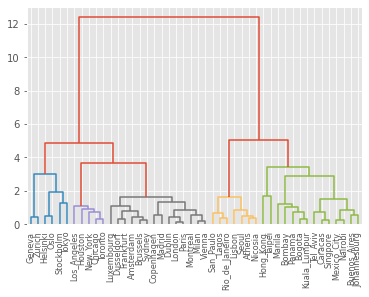

In [15]:
link = linkage(X, 'ward', 'euclidean')

dn = dendrogram(link,
                labels=X.index.tolist(),
                color_threshold = 3.5)

In [16]:
df['cluster'] = fcluster(link, 3.5, criterion='distance')

In [17]:
# Информация о кластерах dbscan добавляется в таблицу данных в виде столбца!

df['dbscan_1'] = dbscan_1.labels_
df.head()

,Work,Price,Salary,cluster,dbscan_1
City,,,,,
Amsterdam,1714,65.6,49.0,3,0
Athens,1792,53.8,30.4,4,1
Bogota,2152,37.9,11.5,5,1
Bombay,2052,30.3,5.3,5,1
Brussels,1708,73.8,50.5,3,0


In [18]:
print (df['dbscan_1'].value_counts())

 0    19
 1    19
-1     4
 2     2
 3     2
Name: dbscan_1, dtype: int64


In [19]:
tab = pd.crosstab(df['dbscan_1'], df['cluster'])

print(tab)

cluster   1  2   3  4   5
dbscan_1                 
-1        2  0   0  0   2
 0        0  5  14  0   0
 1        0  0   0  7  12
 2        2  0   0  0   0
 3        2  0   0  0   0


In [20]:
df['dbscan_2'] = dbscan_2.labels_

In [21]:
tab2 = pd.crosstab(df['dbscan_2'], df['cluster'])

print(tab2)

cluster   1  2   3  4  5
dbscan_2                
-1        6  2   1  0  3
 0        0  3  13  0  0
 1        0  0   0  4  0
 2        0  0   0  3  8
 3        0  0   0  0  3


**Вывод:** Результаты первой кластеризации больше похожи на результаты иерархического кластерного анализа. Давайте посмотрим на средние показатели и состав кластеров.

In [22]:
df.groupby('dbscan_1').mean()

,Work,Price,Salary,cluster,dbscan_2
dbscan_1,,,,,
-1,2051.250000,93.600000,42.375000,3.000000,-1.000000
0,1792.000000,77.526316,55.157895,2.736842,-0.157895
1,1959.210526,50.115789,14.789474,4.631579,1.789474
2,1874.000000,97.950000,95.150000,1.000000,-1.000000
3,1625.000000,114.550000,65.150000,1.000000,-1.000000


In [23]:
#df['dbscan'] = dbscan_1.labels_

df['dbscan_1'].sort_values()

City
Tokyo            -1
Taipei           -1
Stockholm        -1
Hong_Kong        -1
Amsterdam         0
Toronto           0
Sydney            0
Paris             0
New_York          0
Montreal          0
Milan             0
Madrid            0
Vienna            0
Los_Angeles       0
London            0
Luxembourg        0
Houston           0
Chicago           0
Copenhagen        0
Brussels          0
Frankfurt         0
Dusseldorf        0
Dublin            0
Johannesburg      1
Seoul             1
Buenos_Aires      1
San_Paulo         1
Bombay            1
Tel_Aviv          1
Bogota            1
Athens            1
Singpore          1
Rio_de_Janeiro    1
Nicosia           1
Panama            1
Nairobi           1
Mexico_City       1
Manila            1
Lisbon            1
Lagos             1
Kuala_Lumpur      1
Caracas           1
Geneva            2
Zurich            2
Oslo              3
Helsinki          3
Name: dbscan_1, dtype: int64

### Интерпретация
**-1 кластер:** В него попали крупные азиатские города + Стокгольм. Сюдя по средним показателям в этих странах много работают имеют высокие цены и средние зарплаты.

**1 кластер:** Здесь объединились два кластера из ииерархического анализа. Это города Европы и Америки. Их объединяет устойчивое экономическое положение. Средние цены и средние зарплаты.

**2 кластер:** Сюда вошли города Азии, Южной Америки и Африки. Города с жарким климатом и густой населенностью. Люди много работают, мало зарабатывают и имеют плохое соотношение цены/зарплаты.

**3 кластер:** Здесь два города маленькой, но богатой страны Европы - Швейцарии. Их особенность в том, что средние цены и средние зарплаты высокие и практически равны между собой, что позволяет гражданам меньше работать.

**4 кластер:** В данном кластере города Скандинавии. Там самые высокие цены, средние зарплаты и среднее количество часов работы самое низкое среди всех кластеров.

### Вывод
В данной лабораторной работе результаты разделение на кластеры при помощи метода DBSCAN достаточно похожи на результаты работы иерархического кластерного анализа и метода k-means. Недостатком работы метода DBSCAN на данном наборе данных является объединение в один кластер объектов, которые ранее были разделены на различные кластеры, также данный метод менее наглядный, что создает некие трудности при подборе параметров.